In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master
!git clone https://github.com/SKTBrain/KoBERT.git
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-o8w6_97f
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-o8w6_97f
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 954.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 165.4 MB/s eta 0:00

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-veazspfu/kobert-tokenizer_68a77e3517c047aba6e7eb0dc9a66b0e
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-veazspfu/kobert-tokenizer_68a77e3517c047aba6e7eb0dc9a66b0e
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4648 sha256=e887c886624a15209f97f51479d86077933b19cb95f4755dec96765004b129bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-5xceplur/wheels/f7/cb/29/1a737fe71e5108dc30b04ea4a990f78ed271fa537aaf3fce7c
Successfully built kobert_tokenizer


In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Section 4/Project/text/train

/content/drive/My Drive/Colab Notebooks/Section 4/Project/text/train


In [ ]:
import pandas as pd

dataset = pd.read_excel('감성대화말뭉치(최종데이터)_Training.xlsx', index_col=0)

In [ ]:
"""
# 감정 대분류 6가지 -> 숫자로 변경 (라벨)
# 데이터 분할 (훈련, 테스트)
# 사람-시스템 1번 대화(약 5만개) 데이터만 사용 -> 2번, 3번은 앞 내용과 이어지는 내용이라서 다소 애매함.

분노라는 감정은 2차감정 -> 대화의 흐름의 따라 1차 감정으로 변경될 수 있고 이는 혼란을 초래하므로 대화2, 3은 제외.


모델 배포의 아쉬움. 기본 머신러닝의 경우 pickle화 + Flask를 활용하여 로컬 배포를 시도했었는데
딥러닝은 그 과정이 다른 듯 했다. 미처 끝까지 배포하지 못한 것이 아쉬운 마음이다.


NLP의 경우 보다 많은 데이터셋이 필요했다. 5만개의 데이터를 학습시키는 데 1에포크 당 4시간이 소요 되었다.
중간에 유료 결제를 했다. ... 이를 통해 지금까지의 섹션과는 다르게 딥러닝은 시간과의 싸움이라는 것을 알았다.

내가 구현하고자 하는, 설계하고자 하는 가설을 검증하고자 하는 .. 모델과 알고리즘을 정확히 이해하고 이에 맞게 활용하는 것의 중요성도 알게 되었다.

잘한다 잘해!!!! 와 같은 이중 긍정의 구현은 아직이다.

성능: 클래스 6개
"""

'\n# 감정 대분류 5가지 -> 숫자로 변경 (라벨)\n# 데이터 분할 (훈련, 테스트)\n# 사람-시스템 1번 대화(약 5만개) 데이터만 사용 -> 2번, 3번은 앞 내용과 이어지는 내용이라서 다소 애매함.\n\n분노라는 감정은 2차감정 -> 대화의 흐름의 따라 1차 감정으로 변경될 수 있고 이는 혼란을 초래하므로 대화2, 3은 제외.\n피드백 및 한계점 ^^ ... 챗봇을 구현하고 싶었어요.\n\n'

In [ ]:
dataset

,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
51626,노년,남성,재정,만성질환 무,분노,성가신,나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.,경제적인 문제 때문에 막막하시군요. 마음이 편치 않으시겠어요.,아무것도 할 수 없는 내가 무가치하게 느껴지고 실망스러워.,지금 할 수 있는 가장 합리적인 행동은 무엇인가요?,노년층을 위한 경제적 지원이나 부업 같은 것도 알아보아야겠어.,좋은 결과 얻으시길 바랄게요.
51627,노년,여성,재정,만성질환 무,불안,초조한,몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.,건강에 대한 어려움 때문에 기분이 좋지 않으시군요. 속상하시겠어요.,마음 같아서는 다 할 수 있는 일인데 이젠 몸이 안 따라와 주니 화만 나.,어떻게 하면 지금의 기분을 나아지게 할 수 있을까요?,남편과 함께 게이트볼이나 치러 가야겠어. 그럼 기분이 나아질 것 같아.,남편과 함께하는 좋은 외출 시간 되시길 바랄게요.
51628,노년,여성,재정,만성질환 무,상처,희생된,이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.,노후 준비에 대한 어려움 때문에 걱정이 많으시겠어요.,주변 사람들은 다 노후 준비도 잘해두었던데 난 어떻게 해야 할지 모르겠어. 막막하기...,지금의 상황에서 할 수 있는 가장 좋은 행동이 무엇일까요?,남편과 함께 실버 일자리나 노년층을 위한 국가 지원에 대해 자세히 알아보아야겠어.,좋은 정보 많이 얻으셔서 걱정을 좀 덜으셨으면 좋겠어요.
51629,노년,여성,대인관계,만성질환 무,불안,걱정스러운,몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.,가족과의 문제 때문에 속상하시겠어요.,이제 할 수 있는 일도 없고 이렇게 힘들게 사는 게 불만스럽기만 해.,지금의 감정을 나아지게 할 수 있는 어떤 방법이 있을까요?,함께 친하게 지내던 동네 언니 동생들과 빈자리를 조금이나마 채울까 해.,지인분들과 좋은 시간 보내셨으면 좋겠어요.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51630 entries, 1 to 51630
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령      51630 non-null  object
 1   성별      51630 non-null  object
 2   상황키워드   51630 non-null  object
 3   신체질환    51630 non-null  object
 4   감정_대분류  51630 non-null  object
 5   감정_소분류  51630 non-null  object
 6   사람문장1   51630 non-null  object
 7   시스템문장1  51630 non-null  object
 8   사람문장2   51630 non-null  object
 9   시스템문장2  51630 non-null  object
 10  사람문장3   42695 non-null  object
 11  시스템문장3  42695 non-null  object
dtypes: object(12)
memory usage: 5.1+ MB


In [ ]:
dataset.감정_대분류.unique()

array(['분노', '기쁨', '불안', '당황', '슬픔', '상처'], dtype=object)

In [ ]:
df = pd.DataFrame()

df['발화'] = dataset.사람문장1

In [ ]:
"""
감정 라벨링
"""
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(dataset['감정_대분류'])
df['감정'] = encoder.transform(dataset['감정_대분류'])
df.head()

# 라벨링된 감정 매핑 {0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}
mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
mapping

{0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

In [ ]:
df.sample(10)

,발화,감정
1,일은 왜 해도 해도 끝이 없을까? 화가 난다.,2
2,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,2
3,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,2
4,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,2
5,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,2
6,직장에 다니고 있지만 시간만 버리는 거 같아. 진지하게 진로에 대한 고민이 생겨.,2
7,성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔. 나도 섭섭해.,2
8,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.,0
9,졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어.,3
10,요즘 직장생활이 너무 편하고 좋은 것 같아!,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51630 entries, 1 to 51630
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발화      51630 non-null  object
 1   감정      51630 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
"""
DataFrame -> csv
"""

df.to_csv('dataset.csv', index=False)

In [ ]:
"""
dataset.csv -> dataset.tsv
변환 후 업로드 
"""

import gluonnlp as nlp

dataset = nlp.data.TSVDataset('/content/drive/My Drive/Colab Notebooks/Section 4/Project/text/train/dataset.tsv', num_discard_samples=1)
dataset

In [ ]:
"""
데이터셋 분리
"""
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)

print("train shape is:", len(train)) # 41304
print("test shape is:", len(test))  # 10326

train shape is: 41304
test shape is: 10326


In [ ]:
train[0]

['오늘 학교 화장실에서 친구들이 나를 가두고 변기 물을 뿌려서 구역질났어.', '2']

In [ ]:
df['감정'].unique()

array([2, 0, 3, 1, 5, 4])

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
## CPU
# device = torch.device("cpu")

## GPU
device = torch.device("cuda:0")

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

using cached model. /content/drive/My Drive/Colab Notebooks/Section 4/Project/text/train/.cache/kobert_v1.zip
using cached model. /content/drive/MyDrive/Colab Notebooks/Section 4/Project/text/train/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
# Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
"""
Bert tokenizer 사용
"""

tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

# 하단에 선언함.
# tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
# bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
# vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

using cached model. /content/drive/MyDrive/Colab Notebooks/Section 4/Project/text/train/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")
model = AutoModel.from_pretrained("skt/kobert-base-v1")

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/535 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/369M [00:00<?, ?B/s]

In [ ]:
"""
토큰화
"""

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
"""
파라미터 설정

1회 : batch_size = 128, num_epochs = 5
2회 : batch_size = 64, num_epochs = 10
3회 : batch_size = 64, num_epochs = 5
"""

max_len = 64 # 해당 길이 초과시 학습하지 않음.
batch_size = 64 # 64 -> 128 
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [ ]:
# sample = pd.DataFrame({
#     '10':['안녕', '나는', '이', '프로젝트에', '성공했어'],
#     '11':[0, 1, 2, 3, 0]
# })
# sample.iloc[1:, :]

In [ ]:
data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test,0, 1, tok, max_len, True, False)

In [ ]:
data_train[0]

(array([   2, 3419, 4949, 5118, 6903, 4628, 7096, 1370, 6116,  517, 5330,
        5907, 5439, 2339, 5561, 2135, 7088,  517, 6483, 6060, 6553,  517,
        5499, 7350, 5671, 6855,  517,   54,    3,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(29, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 2)

In [ ]:
data_train[1]

(array([   2, 3489, 3886, 5628,  517, 5597, 6280, 5597, 6280,  517, 6249,
        3924,  517, 7145, 6855, 6323, 6060,  517,   54,    3,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(20, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 5)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 6, # 클래스 갯수 변경.
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        else:
            out = pooler
        return self.classifier(out)

In [ ]:
"""
모델 소환
"""

model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [ ]:
"""
옵티마이저 및 가중치 설정
"""

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # softmax(다중분류용) Loss Function

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
"""
accuracy 계산 
"""
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
from tqdm import tqdm, tqdm_notebook

train_history=[]
test_history=[]
loss_history=[]

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1)) # 11:30 ~ 15:50

<ipython-input-122-0ee28f8e9aa5>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/646 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.8893364667892456 train acc 0.09375
epoch 1 batch id 201 loss 0.4673475921154022 train acc 0.6995491293532339
epoch 1 batch id 401 loss 0.3138490915298462 train acc 0.8076683291770573
epoch 1 batch id 601 loss 0.09332916885614395 train acc 0.8381343594009983
epoch 1 train acc 0.8418311403508771


<ipython-input-122-0ee28f8e9aa5>:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/162 [00:00<?, ?it/s]

epoch 1 test acc 0.546129699775533


  0%|          | 0/646 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.4116899073123932 train acc 0.859375
epoch 2 batch id 201 loss 0.312868595123291 train acc 0.8905472636815921
epoch 2 batch id 401 loss 0.2913751006126404 train acc 0.901301433915212
epoch 2 batch id 601 loss 0.08789973706007004 train acc 0.9051320715474209
epoch 2 train acc 0.9057581914344685


  0%|          | 0/162 [00:00<?, ?it/s]

epoch 2 test acc 0.5329861111111112


  0%|          | 0/646 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.4432697594165802 train acc 0.859375
epoch 3 batch id 201 loss 0.521814227104187 train acc 0.9209421641791045
epoch 3 batch id 401 loss 0.2360450178384781 train acc 0.9269404613466334
epoch 3 batch id 601 loss 0.04024859517812729 train acc 0.9319623544093179
epoch 3 train acc 0.9327834752321982


  0%|          | 0/162 [00:00<?, ?it/s]

epoch 3 test acc 0.5421576879910213


  0%|          | 0/646 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.2882157862186432 train acc 0.890625
epoch 4 batch id 201 loss 0.267887681722641 train acc 0.947372512437811
epoch 4 batch id 401 loss 0.16494669020175934 train acc 0.9538653366583542
epoch 4 batch id 601 loss 0.0405290350317955 train acc 0.9572067387687188
epoch 4 train acc 0.9573094040247678


  0%|          | 0/162 [00:00<?, ?it/s]

epoch 4 test acc 0.5492862654320988


  0%|          | 0/646 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.1500822752714157 train acc 0.96875
epoch 5 batch id 201 loss 0.0907600000500679 train acc 0.9633084577114428
epoch 5 batch id 401 loss 0.08154883235692978 train acc 0.9673862219451371
epoch 5 batch id 601 loss 0.021861381828784943 train acc 0.9685420133111481
epoch 5 train acc 0.9686290634674922


  0%|          | 0/162 [00:00<?, ?it/s]

epoch 5 test acc 0.5476290684624018


In [ ]:
"""
문장 입력 테스트
"""

test_sentence = '이번 프로젝트는 어려웠지만 포기하지 않고 최선을 다했어! 덕분에 좋은 결과가 있었어!'
test_label = 1 # 실제 정답

unseen_test = pd.DataFrame([[test_sentence, test_label]], columns = [['10', '11']]) # 에러방지를 위해 컬럼명을 두 자리 숫자로 설정.
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)

1it [00:00,  3.58it/s]

tensor([[ 6.2732, -1.2565, -1.2796, -1.2766, -1.3753, -0.9170]],
       grad_fn=<AddmmBackward0>)


1it [00:00,  1.97it/s]


In [ ]:
# 0: '기쁨', 1: '당황', 2: '분노', 3: '불안', 4: '상처', 5: '슬픔'}

In [ ]:
"""
문장 입력 테스트
"""

def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                test_eval.append("기쁜")
            elif np.argmax(logits) == 1:
                test_eval.append("당황스러운")
            elif np.argmax(logits) == 2:
                test_eval.append("분노에 찬")
            elif np.argmax(logits) == 3:
                test_eval.append("불안한")
            elif np.argmax(logits) == 4:
                test_eval.append("상처받은")
            elif np.argmax(logits) == 5:
                test_eval.append("슬픈")

        print(">> 당신은 현재 " + test_eval[0] + " 상태인 것 같아요.")

In [ ]:
"""
질문 받기. (0입력시 종료)
"""

end = 1
while end == 1 :
    sentence = input("하고싶은 말을 입력해주세요 : ")
    if sentence == "0" :
        break
    predict(sentence)
    print("\n")

하고싶은 말을 입력해주세요 : 정말 멋진 날이야. 이런 날에 살아있다는 사실만으로도 행복해.
>> 당신은 현재 기쁜 상태인 것 같아요.


하고싶은 말을 입력해주세요 : 우리는 도전했고 도전에는 용기가 필요하지, 우리 모두가 자랑스럽구나.
>> 당신은 현재 기쁜 상태인 것 같아요.


하고싶은 말을 입력해주세요 : 밑바닥부터 시작하는 딥러닝.
>> 당신은 현재 불안한 상태인 것 같아요.


하고싶은 말을 입력해주세요 : 0


In [ ]:
"""
batch_size=128
epoch=5


train_history
[0.1953125,
 0.36613805970149255,
 0.5546875,
 0.5667754975124378,
 0.6171875,
 0.6145444651741293,
 0.6875,
 0.6624300373134329,
 0.7109375,
 0.6994713930348259]


test_history
 [0.547693708728108,
 0.5692986469997129,
 0.5693479938271605,
 0.5688657407407407,
 0.5716605656043641]


 loss_history
 [array(1.8225064, dtype=float32),
 array(1.2680811, dtype=float32),
 array(1.209732, dtype=float32),
 array(1.0683473, dtype=float32),
 array(1.0391616, dtype=float32),
 array(1.0320376, dtype=float32),
 array(0.83108246, dtype=float32),
 array(0.8988059, dtype=float32),
 array(0.7697702, dtype=float32),
 array(0.858273, dtype=float32)]
 """

'\nbatch_size=128\nepoch=5\n\n\ntrain_history\n[0.1953125,\n 0.36613805970149255,\n 0.5546875,\n 0.5667754975124378,\n 0.6171875,\n 0.6145444651741293,\n 0.6875,\n 0.6624300373134329,\n 0.7109375,\n 0.6994713930348259]\n\n\ntest_history\n [0.547693708728108,\n 0.5692986469997129,\n 0.5693479938271605,\n 0.5688657407407407,\n 0.5716605656043641]\n\n\n loss_history\n [array(1.8225064, dtype=float32),\n array(1.2680811, dtype=float32),\n array(1.209732, dtype=float32),\n array(1.0683473, dtype=float32),\n array(1.0391616, dtype=float32),\n array(1.0320376, dtype=float32),\n array(0.83108246, dtype=float32),\n array(0.8988059, dtype=float32),\n array(0.7697702, dtype=float32),\n array(0.858273, dtype=float32)]\n '

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

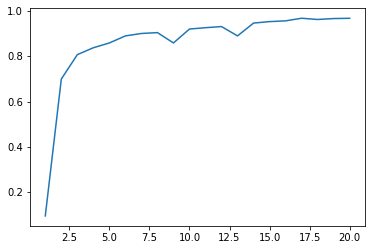

In [ ]:
x=range(1,6)
x2=range(1,21)
plt.plot(x2, train_history)

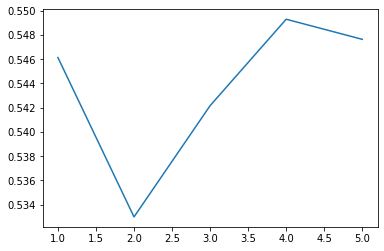

In [ ]:
plt.plot(x, test_history)

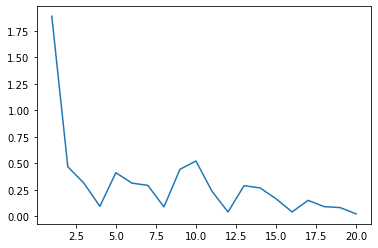

In [ ]:
plt.plot(x2, loss_history)

In [ ]:
# 모델 피클화
import pickle

with open('model2.pkl', 'wb') as p_file:
    pickle.dump(model, p_file)

In [ ]:
PATH = '/content/drive/My Drive/Colab Notebooks/Section 4/Project'

torch.save(model, PATH + 'KoBERT_담화3.pt')  # 전체 모델 저장
torch.save(model.state_dict(), PATH + 'model_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, PATH + 'all.tar')  # 여러 가지 값 저장, 학습 중 진행 상황 저장을 위해 epoch, loss 값 등 일반 scalar값 저장 가능